In [2]:
import pandas as pd


df = pd.read_csv('C:/Users/rohit/depression-risk-predictor/data/processed/sentiment_added_data.csv')
df_encoded = pd.get_dummies(df, columns=['gender', 'occupation'], drop_first=True)
X = df_encoded.drop(['risk', 'post_text'], axis=1)
y = df_encoded['risk']



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
import joblib

rf_model = joblib.load('C:/Users/rohit/depression-risk-predictor/models/best_random_forest.pkl')
xgb_model = joblib.load('C:/Users/rohit/depression-risk-predictor/models/xgboost_model.pkl')


In [5]:
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    "Model": ["Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}

metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.809524,0.928571,0.8125,0.866667
1,XGBoost,0.809524,1.000000,0.7500,0.857143


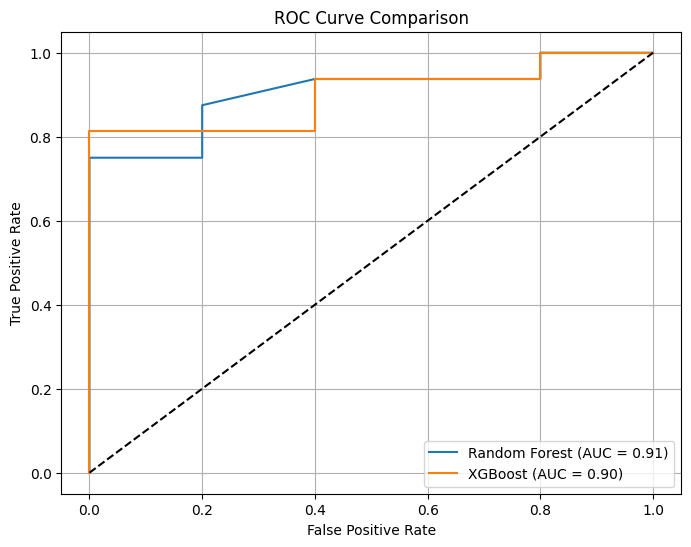

In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {auc(rf_fpr, rf_tpr):.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {auc(xgb_fpr, xgb_tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()


## 🧠 Final Model Decision

- If both models perform similarly, choose the one with **higher recall** (catching at-risk users is critical).
- If XGBoost shows better F1 and ROC-AUC, we will **finalize XGBoost** for deployment.
- You can save your choice in a text file or document it in your notebook.


In [10]:
import joblib
import os

os.makedirs('C:/Users/rohit/depression-risk-predictor/models', exist_ok=True)

# Save the chosen model — change the variable if needed
joblib.dump(xgb_model, 'C:/Users/rohit/depression-risk-predictor/models/final_model.pkl')

# Optional: Save the scaler too
joblib.dump(scaler, 'C:/Users/rohit/depression-risk-predictor/models/final_scaler.pkl')

print("✅ Final model and scaler saved successfully!")


✅ Final model and scaler saved successfully!


In [12]:
joblib.dump(X_train.columns.tolist(), "models/final_features_columns.pkl")


['models/final_features_columns.pkl']

In [13]:
import joblib

# Load your training data (after encoding)
X = joblib.load("C:/Users/rohit/depression-risk-predictor/models/final_features_columns.pkl")
print(X)


['age', 'sleep_hours', 'social_media_minutes', 'activity_level', 'emotional_score', 'mental_health_history', 'sentiment_score', 'gender_Male', 'gender_Other', 'occupation_Chef', 'occupation_Doctor', 'occupation_Engineer', 'occupation_Freelancer', 'occupation_Intern', 'occupation_Manager', 'occupation_Student', 'occupation_Teacher', 'occupation_Writer']
